In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Load dataset
data = pd.read_csv(r"C:/Users/saksh/OneDrive/Desktop/Projects/MP_ML/EditedNewDataset.csv")

In [3]:
# Visualize data distribution
print(data.head())  # Check the first few rows of the dataset

   Gender HairLoss            Duration       Shedding           Dandruff  \
0    Male      Yes  More than 6 months   Occasionally                Yes   
1  Female      Yes  More than 6 months     Frequently                Yes   
2  Female      Yes  Less than 3 months   Occasionally  None of the above   
3  Female      Yes  More than 6 months     Frequently                Yes   
4  Female      Yes  More than 6 months     Frequently  None of the above   

                Type         ItchyScalp        HairGreying  \
0              Flaky    Rarely or never  None of the above   
1            Powdery    Rarely or never                Yes   
2  None of the above  None of the above  None of the above   
3              Flaky    Rarely or never                Yes   
4  None of the above  None of the above  None of the above   

            Treatment       RegularUsage  \
0   None of the above  None of the above   
1   Keratin treatment                 No   
2   None of the above  None of the abo

In [4]:
print(data.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        2999 non-null   object
 1   HairLoss      2999 non-null   object
 2   Duration      2999 non-null   object
 3   Shedding      2999 non-null   object
 4   Dandruff      2999 non-null   object
 5   Type          2999 non-null   object
 6   ItchyScalp    2999 non-null   object
 7   HairGreying   2999 non-null   object
 8   Treatment     2999 non-null   object
 9   RegularUsage  2999 non-null   object
 10  Products      2999 non-null   object
dtypes: object(11)
memory usage: 257.9+ KB
None


In [5]:
print(data.describe()) # Get statistical summary of the dataset

        Gender HairLoss            Duration       Shedding Dandruff  \
count     2999     2999                2999           2999     2999   
unique       2        2                   4              4        2   
top     Female      Yes  More than 6 months   Occasionally      Yes   
freq      1590     2413                 947            850     1944   

                     Type         ItchyScalp HairGreying          Treatment  \
count                2999               2999        2999               2999   
unique                  3                  3           2                  3   
top     None of the above  None of the above         Yes  None of the above   
freq                 1055               1055        1843               1156   

             RegularUsage        Products  
count                2999            2999  
unique                  3              98  
top     None of the above  Biotin gummies  
freq                 1156             318  


In [6]:
# Check for missing values
print(data.isnull().sum())

Gender          0
HairLoss        0
Duration        0
Shedding        0
Dandruff        0
Type            0
ItchyScalp      0
HairGreying     0
Treatment       0
RegularUsage    0
Products        0
dtype: int64


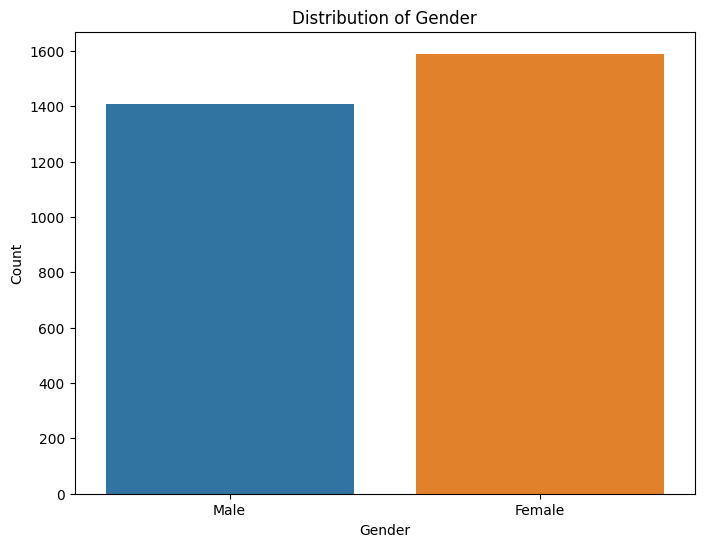

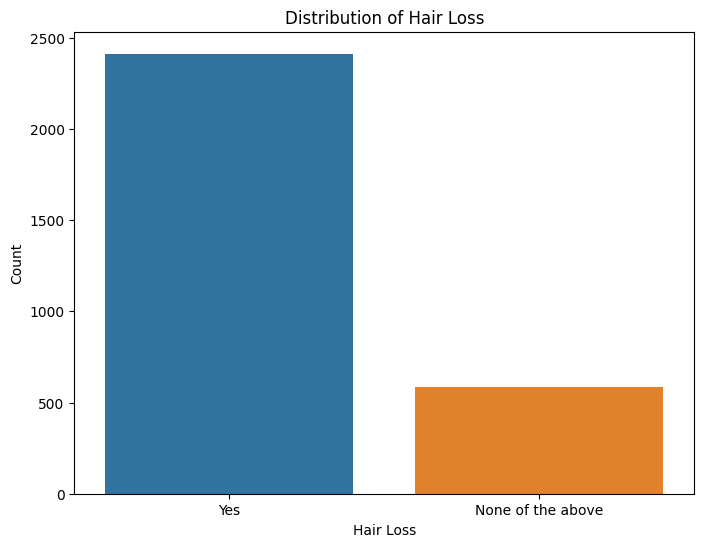

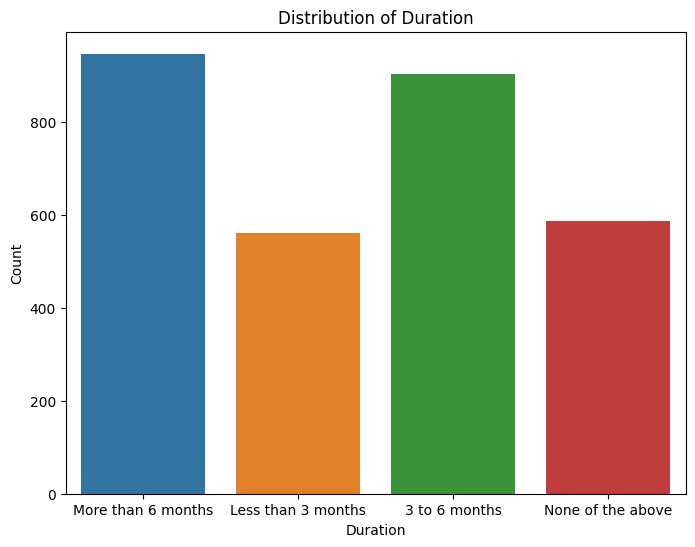

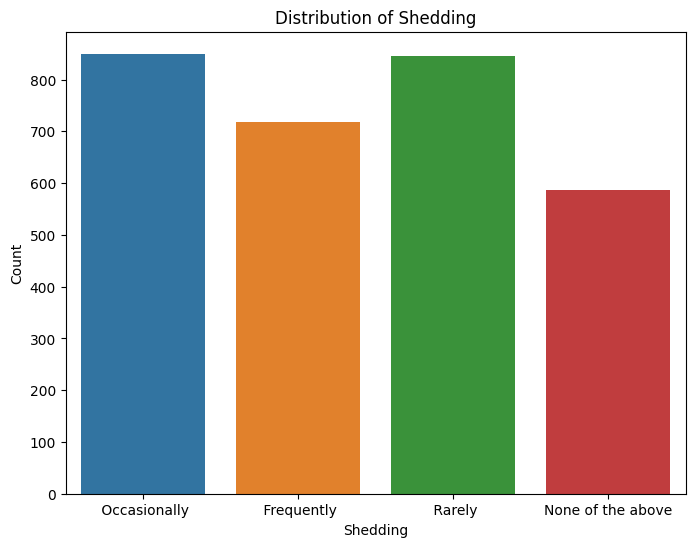

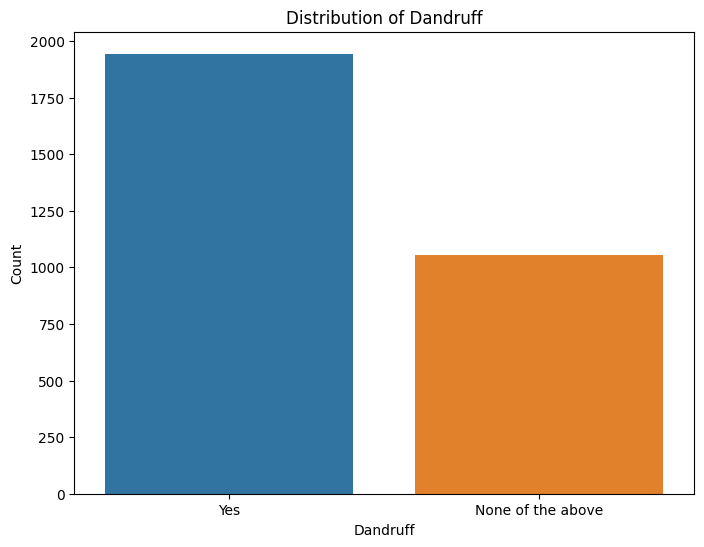

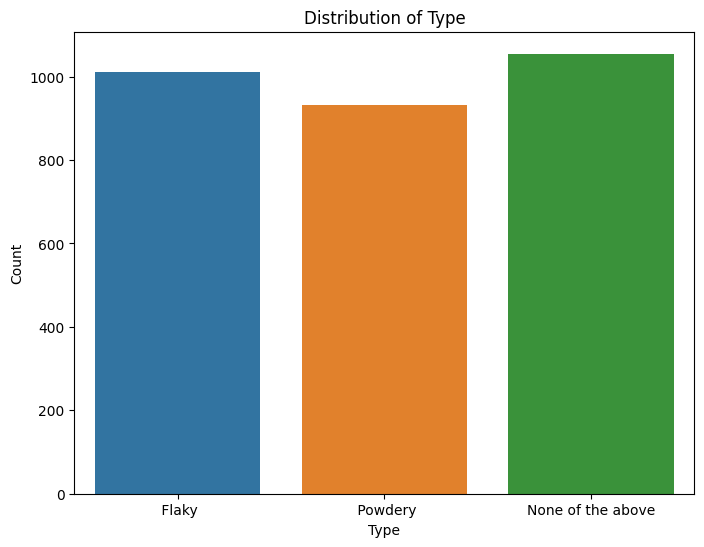

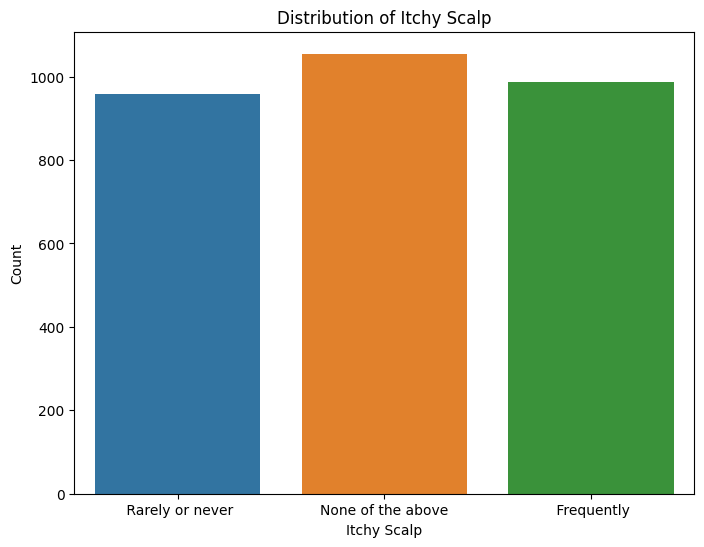

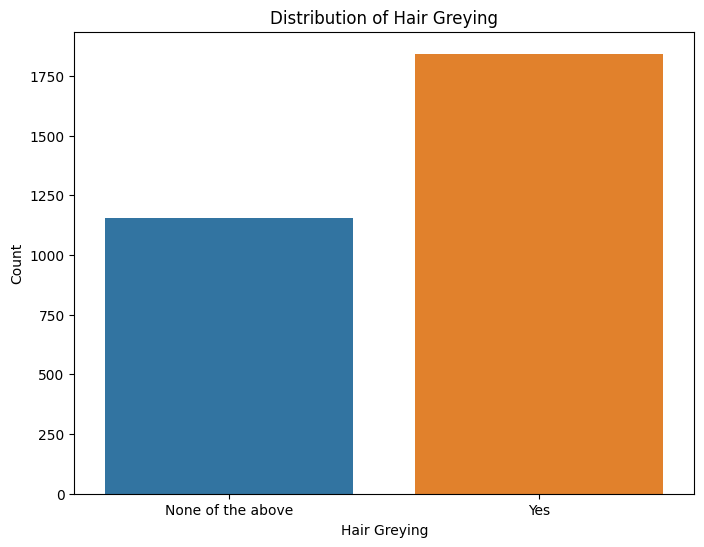

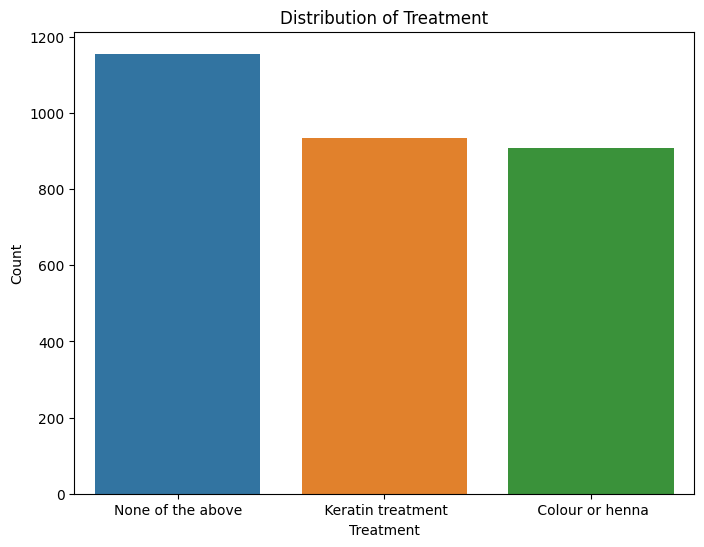

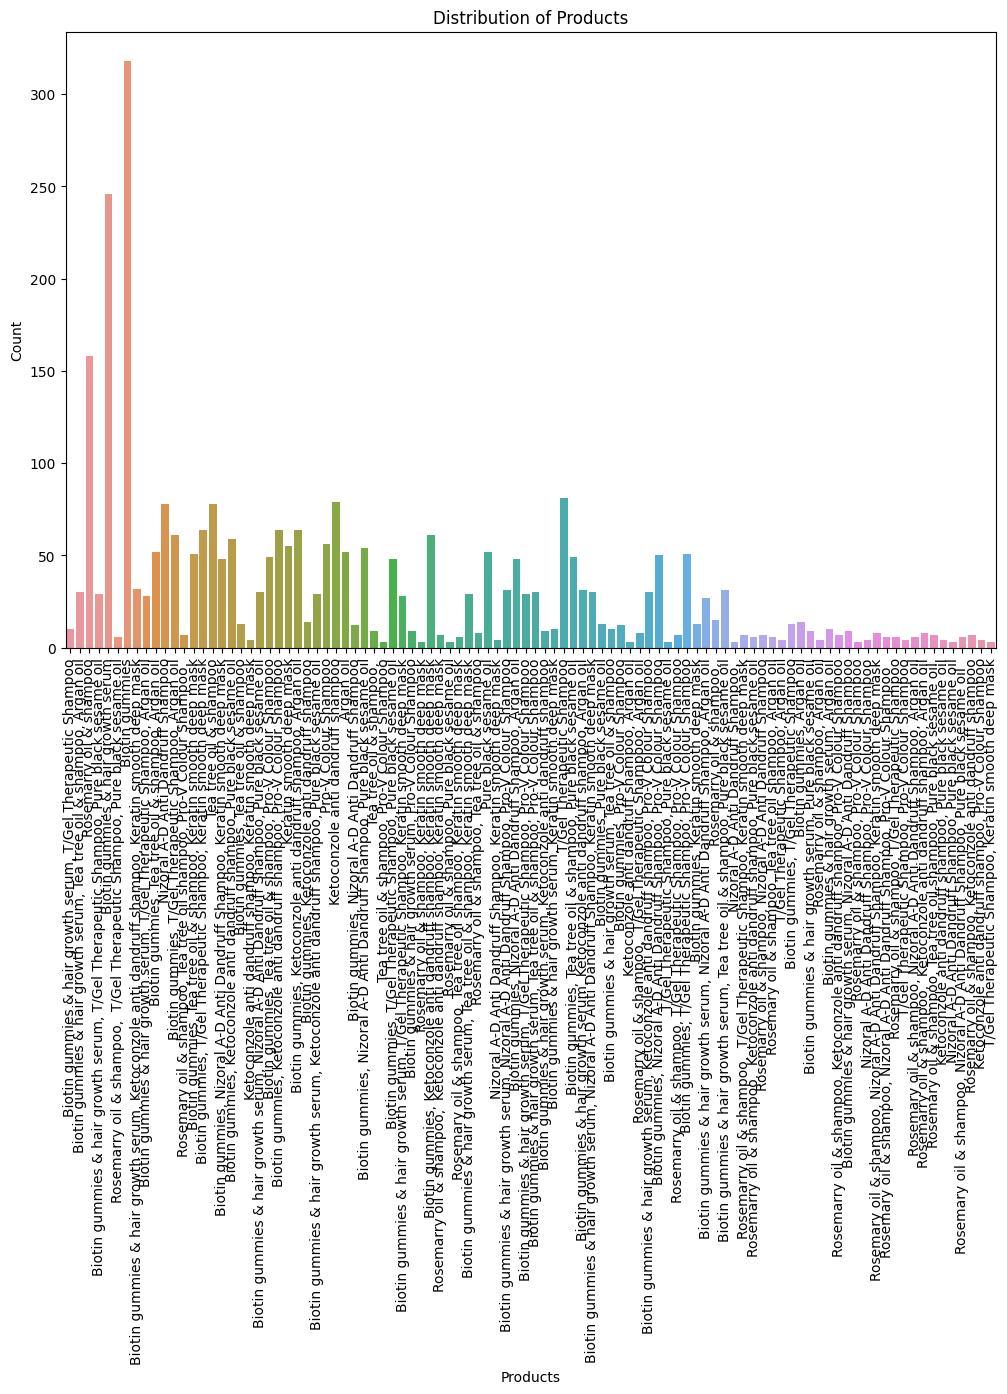

In [7]:
# Data visualization
# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of hair loss
plt.figure(figsize=(8, 6))
sns.countplot(x='HairLoss', data=data)
plt.title('Distribution of Hair Loss')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

# Distribution of duration
plt.figure(figsize=(8, 6))
sns.countplot(x='Duration', data=data)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

# Distribution of shedding
plt.figure(figsize=(8, 6))
sns.countplot(x='Shedding', data=data)
plt.title('Distribution of Shedding')
plt.xlabel('Shedding')
plt.ylabel('Count')
plt.show()

# Distribution of dandruff
plt.figure(figsize=(8, 6))
sns.countplot(x='Dandruff', data=data)
plt.title('Distribution of Dandruff')
plt.xlabel('Dandruff')
plt.ylabel('Count')
plt.show()

# Distribution of type
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Distribution of itchy scalp
plt.figure(figsize=(8, 6))
sns.countplot(x='ItchyScalp', data=data)
plt.title('Distribution of Itchy Scalp')
plt.xlabel('Itchy Scalp')
plt.ylabel('Count')
plt.show()

# Distribution of hair greying
plt.figure(figsize=(8, 6))
sns.countplot(x='HairGreying', data=data)
plt.title('Distribution of Hair Greying')
plt.xlabel('Hair Greying')
plt.ylabel('Count')
plt.show()

# Distribution of treatment
plt.figure(figsize=(8, 6))
sns.countplot(x='Treatment', data=data)
plt.title('Distribution of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

# Distribution of products (target variable)
plt.figure(figsize=(12, 8))
sns.countplot(x='Products', data=data)
plt.title('Distribution of Products')
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
# Drop 'gender' column from the dataset
data.drop('Gender', axis=1, inplace=True)

In [9]:
# Preprocessing - Convert categorical variables to numerical using appropriate encoding methods
data_encoded = pd.get_dummies(data, columns=['HairLoss', 'Duration', 'Shedding', 'Dandruff', 'Type', 'ItchyScalp', 'HairGreying', 'Treatment', 'RegularUsage'])

In [10]:
# Separate features and target
X = data_encoded.drop('Products', axis=1)
y = data_encoded['Products']

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Random Forest
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Report:
                                                                                                 precision    recall  f1-score   support

                                                                                      Argan oil       1.00      1.00      1.00         8
                                                                                 Biotin gummies       1.00      1.00      1.00        62
                                                             Biotin gummies & hair growth serum       1.00      1.00      1.00        40
                                                  Biotin gummies & hair growth serum, Argan oil       1.00      1.00      1.00         2
                          Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo       1.00      1.00      1.00         3
               Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Argan oil       1.00      1.00      1.00         3
Biotin 


Random Forest Evaluation:
                                                                                                 precision    recall  f1-score   support

                                                                                      Argan oil       1.00      1.00      1.00         8
                                                                                 Biotin gummies       1.00      1.00      1.00        62
                                                             Biotin gummies & hair growth serum       1.00      1.00      1.00        40
                                                  Biotin gummies & hair growth serum, Argan oil       1.00      1.00      1.00         2
                          Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo       1.00      1.00      1.00         3
               Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Argan oil       1.00      1.00      1.00         3
Biotin gummie

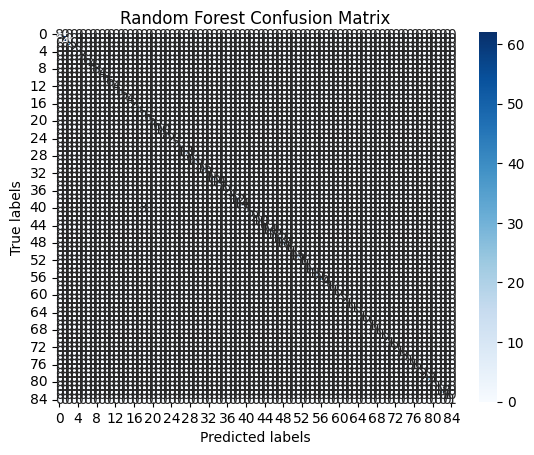

In [13]:
# Define a function to print and plot evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate Random Forest model
evaluate_model("Random Forest", y_test, rf_predictions)

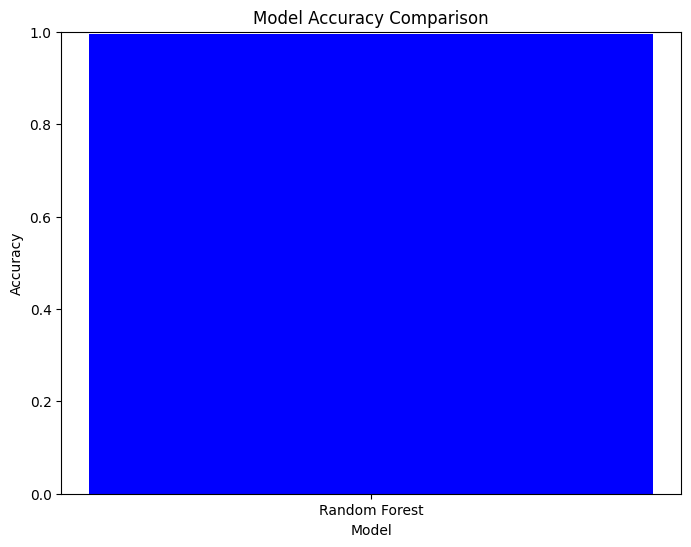

In [21]:
# Calculate accuracy for each model
rf_accuracy = rf_model.score(X_test, y_test)

# Plot accuracy comparison
model = [ 'Random Forest']
accuracy_scores = [rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(model, accuracy_scores, color=['blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

In [15]:
# New data
new_data = pd.DataFrame({'HairLoss': ['Yes'], 'Duration': ['Less than 3 months'], 'Shedding': ['Rarely'], 'Dandruff': ['None of the above'], 'Type': ['None of the above'], 'ItchyScalp': ['None of the above'], 'HairGreying': ['None of the above'], 'Treatment': ['None of the above'], 'RegularUsage': ['None of the above']})

# Encode new data
new_data_encoded = pd.get_dummies(new_data, columns=['HairLoss', 'Duration', 'Shedding', 'Dandruff', 'Type', 'ItchyScalp', 'HairGreying', 'Treatment', 'RegularUsage'])

# Reorder columns of new_data_encoded to match X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predictions using Random Forest
rf_prediction = rf_model.predict(new_data_encoded)
print("Random Forest - Recommended Product:", rf_prediction)

Random Forest - Recommended Product: ['Rosemarry oil & shampoo']


In [22]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'quiz_model.pkl')

['quiz_model.pkl']